Adapted from *Physics Simulations in Python -- A Lab Manual*, by Daniel V. Schroeder, Department of Physics, Weber State University, http://physics.weber.edu/schroeder/scicomp/

This work is licensed under the Creative Commons Attribution 4.0 International License.  To view a copy of this license, visit http://creativecommons.org/licenses/by/4.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

# Introduction

Many physical systems, such as the molecules modeled in the previous project, are
so chaotic that the motions might as well be random.  But in that case,
why should we even bother to calculate the actual trajectories?  For many purposes
we can get away with substituting fictitious "random" behavior for the actual
behavior of a system. 

In this project, you will write several short computer programs that use computer-generated
"random" numbers to model simple physical systems.  Programs that use random numbers
to choose among various possible outcomes are called *Monte Carlo simulations*,
after the famous European gambling resort.

# Expansion of a gas

Consider the situation shown in figure below:  A box is divided into two sections of equal size, separated by a partition.  On one side of the partition is a gas of $n$ molecules; on the other side is a vacuum.  We then puncture the partition and allow the molecules to pass from one side to the other.  What happens to the number of molecules on each side as time passes?

![dummy](http://www.math.tau.ac.il/~haimav/TwoBoxes.png)

To answer this question we *could* write a full-blown molecular dynamics simulation.
Or we could just recognize that for our purposes the motions will be essentially random,
and say that each of the $n$ molecules has an equal probability of switching sides during
any short time interval.

**Exercise.** In the cell below, write a program to simulate the behavior of this system.
Use the variables **n** for the total number of molecules and **nLeft** for the number
that are currently on the left side of the box.  In each step of "time", choose a molecule
at random (by generating a suitable random number) and move it to the other side of the box (by increasing or decreasing **nLeft** by 1).  To determine which side your randomly chosen molecule is on, you can simply
assume that the first **nLeft** molecules are on the left and the rest are on the right; then there is no need to create any lists to represent the molecules.
The output of your program should be a plot of **nLeft** vs. "time".  Use the package *matplotlib.pyplot* to generate the plot. This means that you'll need to build lists of the values to plot; you might call them **tList** and **nLeftList**.  Adjust the appearance of the plot appropriately, being sure give it a suitable title and labels on both axes.  Use $n=1000$.

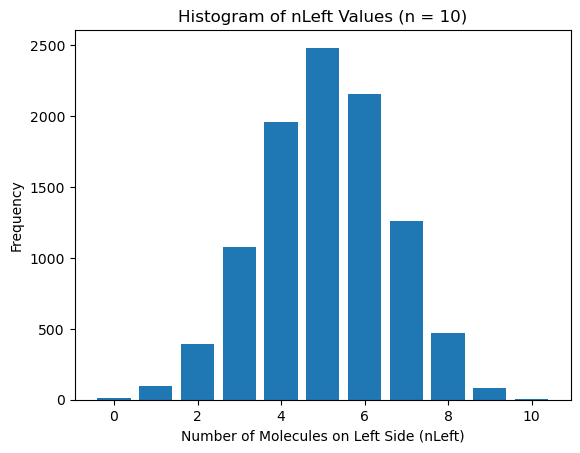

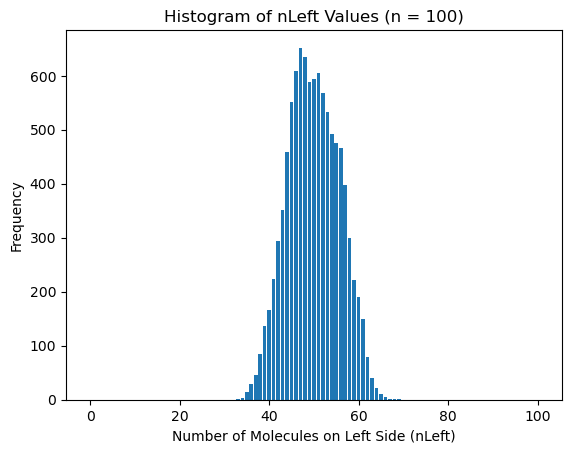

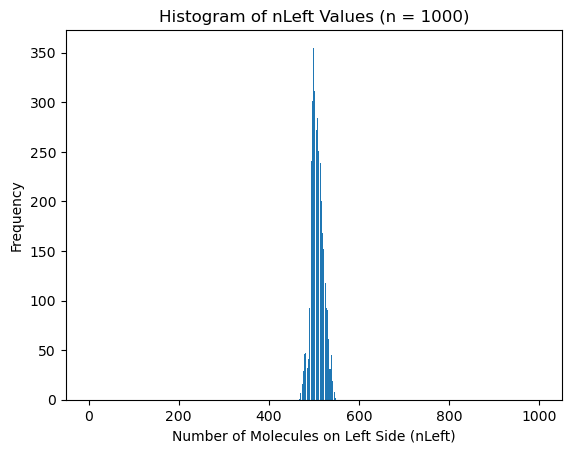

In [13]:
import matplotlib.pyplot as plt
import random

# base function to simulate the gas expansion and create a histogram
def simulate_and_create_histogram(n, time_steps):
    nLeft = n // 2  # start with half the molecules on each side
    hist = [0] * (n + 1)  # initialize the histogram list
    
    for t in range(time_steps):
        hist[nLeft] += 1  # update the histogram
        
        # simulate the random movement of molecules
        if random.random() < nLeft / n:
            nLeft -= 1
        else:
            nLeft += 1
    
    return hist

# parameters
time_steps = 10000
values_of_n = [10, 100, 1000]

# run thw simulation for diffrent values of n 
for n in values_of_n:
    hist = simulate_and_create_histogram(n, time_steps)
    
    # Plot the histogram
    plt.figure()
    plt.bar(range(n + 1), hist)
    plt.title(f'Histogram of nLeft Values (n = {n})')
    plt.xlabel('Number of Molecules on Left Side (nLeft)')
    plt.ylabel('Frequency')
    plt.show()

# Commenting out the previous plotting code
# plt.plot(tList, nLeftList)
# plt.title('Number of Molecules on the Left Side Over Time')
# plt.xlabel('Time Steps')
# plt.ylabel('Number of Molecules on Left Side (nLeft)')
# plt.show()


**Question.** Why did we put the word "time" in quotes?  Can you use this simulation to 
determine the amount of time (in seconds) before about half the molecules will be on each 
side of the box?

**Answer:** 

The word time is in quotes because it refers to arbitrary steps in the simulation, not actual physical units of times like seconds or minutes. 
Each step is modeling the random movement of molecules but still not correspond to read time.

Notice from your simulation that even after roughly half the molecules are on each side of 
the box, the number on the left side fluctuates significantly.  It's interesting to
study these fluctuations in a little more detail.

**Exercise.** To study fluctuations around equilibrium, modify your simulation to start with
exactly half of the molecules on each side.  Run the simulation for **n** equal to
10, 100, and 1000, and in each case, estimate (from the graph) the typical amount
by which **nLeft** fluctuates away from **n/2**.  Write down these estimated
numbers and discuss them briefly.  (There is no need to print these graphs.)

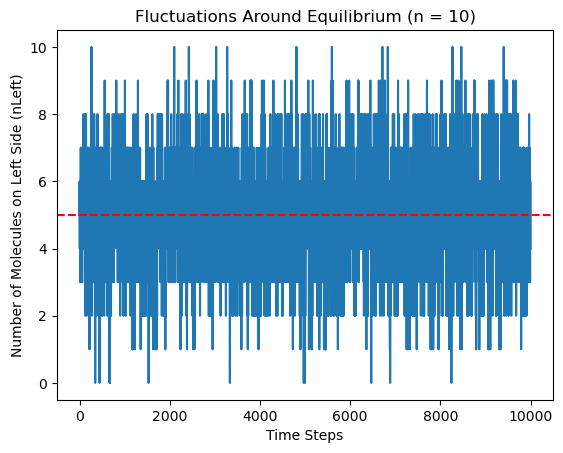

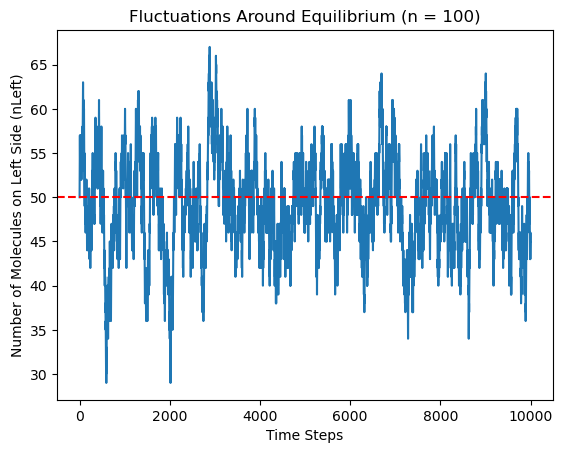

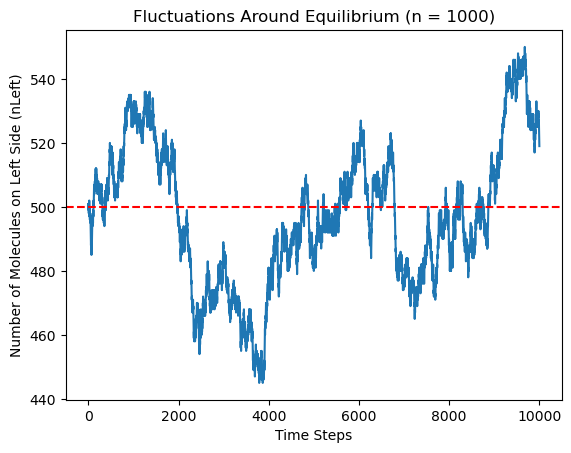

 the typical fluctuation away from n/2 to n is = 10: 1.2118
 the typical fluctuation away from n/2 to n is = 100: 4.2854
 the typical fluctuation away from n/2 to n is = 1000: 18.0346


In [58]:
import matplotlib.pyplot as plt
import random

# base function to simulate the gas expansion and create a histogram
def simulate_fluctuations(n, time_steps):
    nLeft = n // 2  # Start with half the molecules on each side
    tList = []
    nLeftList = []
    
    for t in range(time_steps):
        tList.append(t)
        nLeftList.append(nLeft)
        
        if random.random() < nLeft / n:
            nLeft -= 1
        else:
            nLeft += 1
    
    return nLeftList

# parameters
time_steps = 10000
values_of_n = [10,100,1000]
fluctuations = []

# run thw simulation for different values of n
for n in values_of_n:
    nLeftList = simulate_fluctuations(n, time_steps)
    
    # calculate fluctuations
    fluctuations_around_mean = [abs(nLeft - n/2) for nLeft in nLeftList]
    average_fluctuation = sum(fluctuations_around_mean) / len(fluctuations_around_mean)
    fluctuations.append(average_fluctuation)
    
    # plot the results
    plt.figure()
    plt.plot(nLeftList)
    plt.title(f'Fluctuations Around Equilibrium (n = {n})')
    plt.xlabel('Time Steps')
    plt.ylabel('Number of Molecules on Left Side (nLeft)')
    plt.axhline(y=n/2, color='r', linestyle='--')
    plt.show()

# output the estimated fluctuations
for i, n in enumerate(values_of_n):
    print(f" the typical fluctuation away from n/2 to n is = {n}: {fluctuations[i]}")



**Answers:** 

the typical fluctuation away from n/2 to n is = 10: 1.2118
 the typical fluctuation away from n/2 to n is = 100: 4.285

4
 the typical fluctuation away from n/2 to n is = 1000: 18.034626

**Exercise.** Comment-out the plotting code in your  program, and modify it to instead create a histogram plot, with **nLeft** on the
horizontal axis and the number of times that that value of **nLeft**  occurs on the vertical
axis.  To store the histogram you'll need a list whose index runs over all possible values of **nLeft**.  You can create this list, and initialize all its values to zero, with a statement like ``hist = [0] * (n+1)``.  After each step of the simulation,
add 1 to the appropriate element of this list.  It's customary to display the histogram as a bar graph; you can do this by using the *plt.bar* function instead of *plt.plot*.  Be sure to give the plot a title and to label both axes.  Run your simulation for **n** equal to 10, 100, and 1000, 
and briefly describe the appearance of the histogram plots. 

**Answers:** 

- **For \(n = 10\):** The histogram  show significant fluctuations around the equilibrium value of 5, with a wide spread of `nLeft` values.

- **For \(n = 100\):** The histogram show a narrower spread around the equilibrium value of 50, ; whic indicating about smaller relative fluctuations.

- **For \(n = 1000\):** The histogram  is even more narrower around the equilibrium value of 500, with the majority  values of `nLeft` values close to this mean.
rs.


After a long time that the molecules jump from one side of the box to the other, we have **nLeft** molecules at the left side of the box and **nRight** molecules at the right side of the box. Since all molecules are identical, and after a long time there is not preference for one side over the other, we have each molecule has probability $1/2$ to be in each of the sides. The probability of getting a certain value for **nLeft** is thus given by the *binomial distribution*, namely,
\begin{equation}
\hbox{Probability} = {1\over2^n}{n!\over (n_{\rm left}!)(n{-}n_{\rm left})!}
  = {1\over2^n}{n!\over (n_{\rm left}!)(n_{\rm right}!)}.  \label{binomial}
\end{equation}
For a sufficiently long run, therefore, the values in your histogram should be
approximately equal to this formula times the number of steps in the simulation.

**Exercise.** Copy your program to the cell below the next exercise, and add a function definition to your program to compute and return the value of the binomial distribution, as a function of **n** and **nLeft**.  Use Python's built-in *factorial* function, which is part of the *math* package. 

**Exercise.** Now use your binomial distribution function to plot the
"theoretical" (long-term average) distribution of **nLeft** values on your histogram
plot.  Use *plt.plot* for the theoretical distribution, drawing it as a continuous line (no markers), in a color that contrasts with the histogram bars.  To add a legend to the graph, insert
```
  label="Monte Carlo results"
```
as a parameter in the *plt.bar* function call, and insert a similar parameter into the *plt.plot* function call.  Then, before calling *plt.show*, insert the function call *plt.legend()*.  Run the simulation for **n** = 10 and 100, with enough
"time" steps to produce reasonably good agreement between the actual and theoretical
distributions.  

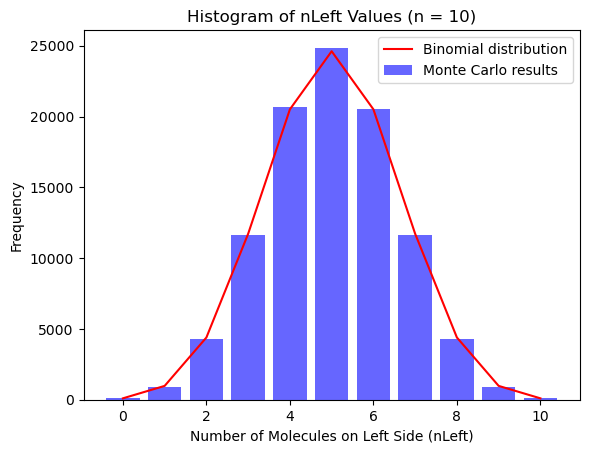

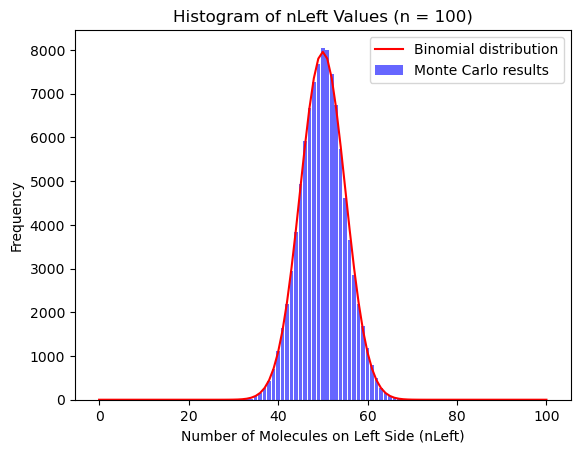

In [21]:
import matplotlib.pyplot as plt
import random
import math

# base function to simulate the gas expansion and create a histogram
def simulate_and_create_histogram(n, time_steps):
    nLeft = n // 2  # start with half the molecules on each side
    hist = [0] * (n + 1)  
    
    for t in range(time_steps):
        hist[nLeft] += 1  # Update the histogram
        
        # simulate the random movement of molecules
        if random.random() < nLeft / n:
            nLeft -= 1
        else:
            nLeft += 1
    
    return hist

# function to compute the binomial distribution
def binomial_distribution(n, nLeft):
    return (math.factorial(n) / (math.factorial(nLeft) * math.factorial(n - nLeft))) * (0.5 ** n)

# parameters
time_steps = 100000  # Increase the number of steps for better agreement
values_of_n = [10, 100]

# run the simulation for different values of n and plot the histograms
for n in values_of_n:
    hist = simulate_and_create_histogram(n, time_steps)
    
    # compute the binomial distribution
    theoretical_distribution = [binomial_distribution(n, nLeft) * time_steps for nLeft in range(n + 1)]
    
    # ploting the histogram
    plt.figure()
    plt.bar(range(n + 1), hist, label='Monte Carlo results', color='blue', alpha=0.6)
    plt.plot(range(n + 1), theoretical_distribution, color='red', label='Binomial distribution')
    plt.title(f'Histogram of nLeft Values (n = {n})')
    plt.xlabel('Number of Molecules on Left Side (nLeft)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


# Random walks

Next, let us consider the erratic motion of a single microscopic particle.
The particle could be a gas molecule,
a dust grain suspended in a fluid, or a conduction electron in a copper wire.
In all these cases the particle collides frequently with neighboring particles and
therefore moves back and forth in a way that appears mostly or entirely random.
Such motion is referred to as a *random walk*.

The simplest example of a random walk is in one dimension, with all steps of the
same size, each step equally likely to be one way or the other.  This example
is mathematically similar to the previous simulation of a gas in two boxes.

**Exercise.** In the cell below, write a new Python program  to model a 
random walk in the $x$ direction.  During each time step the particle should move
one unit of distance, with a 50-50 chance of moving in the positive or negative
direction.  Start the particle at $x=0$.  Plot a graph of the particle's position
as a function of time for some fixed number of steps, then repeat the simulation 
several (20 or more) times over, plotting all the results on the same graph.  
Describe the results and show a graph from a typical run of the program.  As you increase the number of steps in the walk, what happens to the typical net distance traveled?

the RMS distance for 100 steps: 9.69
the RMS distance for 500 steps: 22.07
the RMS distance for 1000 steps: 31.38
the RMS distance for 5000 steps: 72.32
the RMS distance for 10000 steps: 99.57


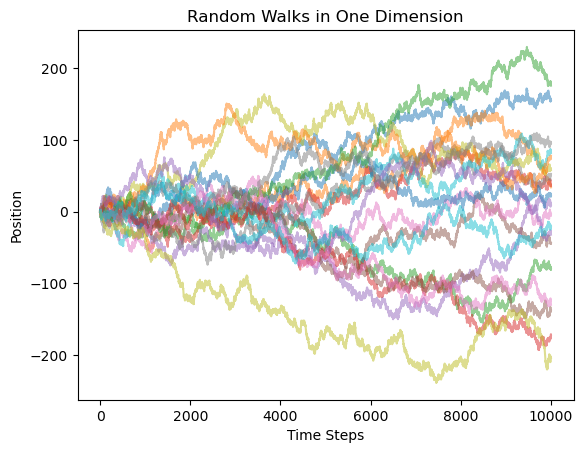

In [64]:
import matplotlib.pyplot as plt
import random
import math

# base function to perform a single random walk
def random_walk(steps):
    position = 0  # Start at x = 0
    positions = [position]  # List to store positions
    
    for _ in range(steps):
        step = 1 if random.random() < 0.5 else -1
        position += step
        positions.append(position)
    
    return positions

# function to calculate rms distance
def calculate_rms(steps, num_simulations):
    final_positions = []

    for _ in range(num_simulations):
        walk = random_walk(steps)
        final_positions.append(walk[-1])

    # calculate the rms distance
    squared_positions = [pos**2 for pos in final_positions]
    mean_squared_distance = sum(squared_positions) / len(squared_positions)
    rms_distance = math.sqrt(mean_squared_distance)
    
    return rms_distance

# parameters
steps_list = [100, 500, 1000, 5000, 10000]  
num_simulations = 1000  # Number of simulations for each step count

# calculate and print rms distances for different number steps
for steps in steps_list:
    rms_distance = calculate_rms(steps, num_simulations)
    print(f"the RMS distance for {steps} steps: {rms_distance:.2f}")

# plotting multiple random walks for the largest step count
plt.figure()
for _ in range(20):  # Plot 20 random walks
    walk = random_walk(max(steps_list))
    plt.plot(walk, alpha=0.5)

plt.title('Random Walks in One Dimension')
plt.xlabel('Time Steps')
plt.ylabel('Position')
plt.show()


**Answers:** 

When we increase the number of steps, we can observe that the distance from the starting point to the end increases in a coordinated manner. We can roughly see that the distance is approximately the "root mean square" of the number of steps. Therefore, taking more steps will cause the particle to be further away from the starting point, regardless of the random direction of the step


icle.


**Exercise.** To quantify your answer to the previous question, modify your program
to calculate the root-mean-square (rms) net distance traveled by all of your random walkers.
This is the square root of the average of the squares of the final positions.  After calculating this quantity, simply print it to the screen.
Run your program for several different values of the number of steps in the walk.  Can you guess an approximate formula for the rms displacement as a function of the number of steps?

**Answer:** 

 we can observe that the rms is approximately proportional to the square root of the number of steps.
 where the typical distance traveled grows with the square root of the number of steps taken.
so we can to concluse which this relationship can be expressed as:

$\[ \text{RMS distance} \approx \sqrt{\text{number of steps}} \]$

t


aken.


**Question.** Why not simply compute the *average* net displacement of the random
walkers, rather than the rms displacement?

**Answer:** 

**Symmetry and Cancellation:**  the average net displacement tends to zero as positive and negative steps cancel out..

**Magnitude of Spread:** RMS reflects the typical distance traveled, regardless of direction
ro.


# Nuclear decay

A classic example of random behavior is nuclear decay.  Each radioactive isotope has
a certain intrinsic probability of decaying per unit time.  As far as we can tell,
the time when any particular nucleus decays is truly random.

**Exercise.** In the cell below, write a new Python program to model the decay of
a collection of $n$ radioactive nuclei of the same isotope.  Let the probability of
each nucleus decaying per unit time be 0.001.  During each time step, for each
remaining nucleus, generate a random number to determine whether that nucleus decays.  Once you have calculated how many nuclei decay during a given time step, subtract that number from $n$ and then repeat.
Run the simulation long enough for at least 90% of the nuclei to decay.
The output of the program should be a graph of $n$ vs. time, labeled as usual.  Run your program with
$n$ initially equal to 100, and keep a printout of the graph.  Repeat for 
$n = 10,000$.

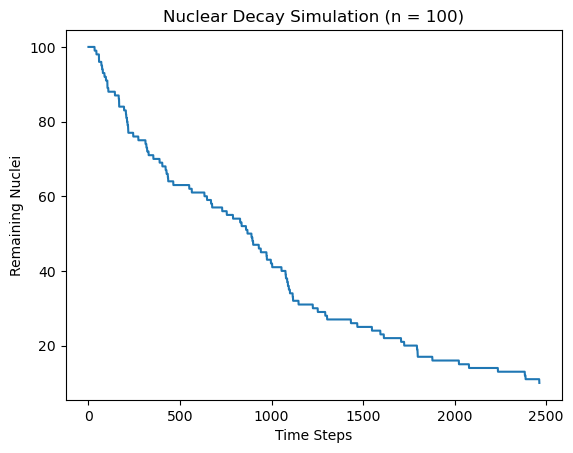

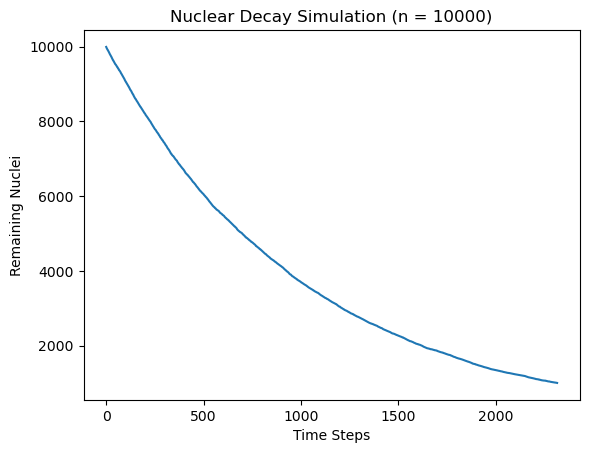

In [87]:
import matplotlib.pyplot as plt
import random

# function to simulate nuclear decay
def simulate_nuclear_decay(n, decay_prob, min_remaining_ratio=0.1):
    remaining_nuclei = n
    time_steps = 0
    remaining_nuclei_list = []

    while remaining_nuclei > n * min_remaining_ratio:
        decayed = 0
        for _ in range(remaining_nuclei):
            if random.random() < decay_prob:
                decayed += 1
        remaining_nuclei -= decayed
        remaining_nuclei_list.append(remaining_nuclei)
        time_steps += 1

    return remaining_nuclei_list

# parameters
n_values = [100, 10000]
decay_prob = 0.001

# run the simulation and ploting the results
for n in n_values:
    remaining_nuclei_list = simulate_nuclear_decay(n, decay_prob)
    
    plt.figure()
    plt.plot(remaining_nuclei_list)
    plt.title(f'Nuclear Decay Simulation (n = {n})')
    plt.xlabel('Time Steps')
    plt.ylabel('Remaining Nuclei')
    plt.show()


**Exercise.** Use your code to determine the approximate half-life of this isotope, that is, the average time for half of the nuclei to decay.

##### **Answer:** 

Approximate half  life for n  =100   :    650 steps

Approximate half life for n =  10000   :   680 steps


**Question.**  When $n=10,000$, how many nuclei do you expect to decay (on average) during the very
first time interval of this simulation?  Explain.

**Answer:** 

For \( n = 10,000 \) nuclei with a decay probability of 0.001 per time interval, we expect \( 10,000 \times 0.001 = 10 \) nuclei to decay on average during the first time interval. This is because each nucleus has a 0.001 probability of decaying.


**Exercise.**  In the cell below, write a new simulation program to answer the
previous question in more detail.  The program should simulate only the very first
time interval of the decay of 10,000 nuclei, where each nucleus has a probability
to decay of 0.001.  However, the program should repeat this one-time-interval
"experiment" a hundred or more times, and plot a histogram of the results,
so you can see in detail how the actual number of decays tends to fluctuate around
the average expected number.

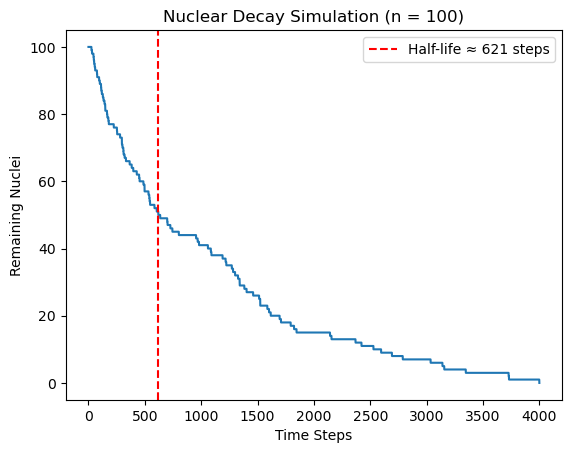

Approximate half-life for n = 100: 621 steps


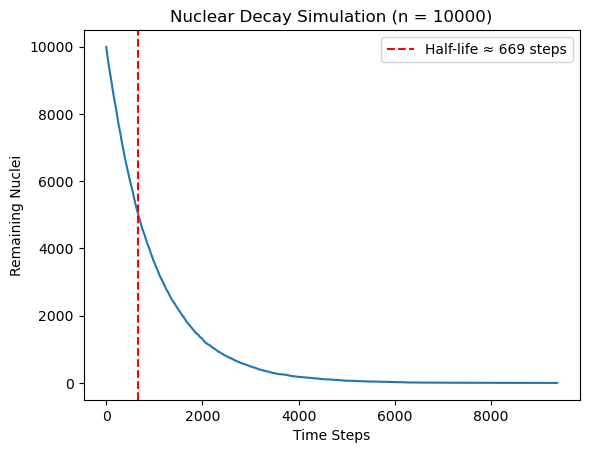

Approximate half-life for n = 10000: 669 steps


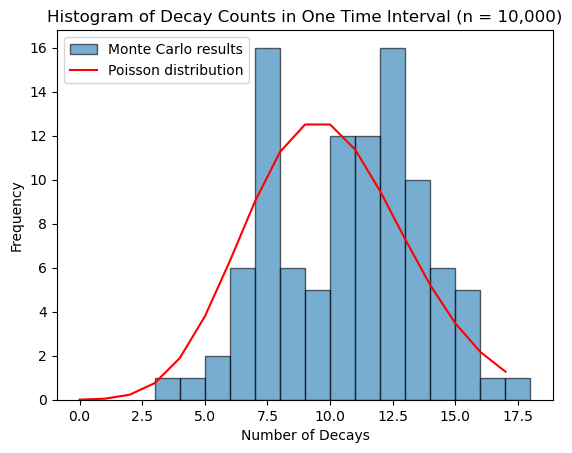

In [100]:
import matplotlib.pyplot as plt
import random
import math

# function to simulate nuclear decay and determine half life
def simulate_nuclear_decay_and_half_life(n, decay_prob):
    remaining_nuclei = n
    time_steps = 0
    half_life_step = None
    remaining_nuclei_list = []

    while remaining_nuclei > 0:
        if remaining_nuclei <= n / 2 and half_life_step is None:
            half_life_step = time_steps
        
        decayed = 0
        for _ in range(remaining_nuclei):
            if random.random() < decay_prob:
                decayed += 1
        remaining_nuclei -= decayed
        remaining_nuclei_list.append(remaining_nuclei)
        time_steps += 1

    return remaining_nuclei_list, half_life_step

# function to simulate one time interval decay
def simulate_one_interval_decay(n, decay_prob, num_experiments):
    decay_counts = []

    for _ in range(num_experiments):
        decayed = 0
        for _ in range(n):
            if random.random() < decay_prob:
                decayed += 1
        decay_counts.append(decayed)
    
    return decay_counts

# function to compute the poisson distribution
def poisson_distribution(lmbda, k):
    return (lmbda ** k * math.exp(-lmbda)) / math.factorial(k)

# parameters for half life simulation
n_values = [100, 10000]
decay_prob = 0.001

# run the half life simulation and plot the results
for n in n_values:
    remaining_nuclei_list, half_life_step = simulate_nuclear_decay_and_half_life(n, decay_prob)
    
    plt.figure()
    plt.plot(remaining_nuclei_list)
    plt.title(f'Nuclear Decay Simulation (n = {n})')
    plt.xlabel('Time Steps')
    plt.ylabel('Remaining Nuclei')
    plt.axvline(half_life_step, color='r', linestyle='--', label=f'Half-life ≈ {half_life_step} steps')
    plt.legend()
    plt.show()
    
    print(f"Approximate half life for n = {n}: {half_life_step} steps")

# parameters for one time-interval decay simulation
n = 10000
num_experiments = 100
lmbda = n * decay_prob

# simulate and get the decay counts
decay_counts = simulate_one_interval_decay(n, decay_prob, num_experiments)

# calculate the Poisson distribution
max_k = max(decay_counts)
poisson_values = [poisson_distribution(lmbda, k) * num_experiments for k in range(max_k + 1)]

#plot the histogram and Poisson distribution
plt.figure()
plt.hist(decay_counts, bins=range(min(decay_counts), max(decay_counts) + 2), edgecolor='black', alpha=0.6, label='Monte Carlo results')
plt.plot(range(max_k + 1), poisson_values, 'r-', label='Poisson distribution')
plt.title('Histogram of Decay Counts in One Time Interval (n = 10,000)')
plt.xlabel('Number of Decays')
plt.ylabel('Frequency')
plt.legend()
plt.show()


After a sufficiently large number of trials, the histogram plotted by this
program should take on a well-defined shape.  And as you might guess, there is a fairly
simple formula for this shape.  If the average expected number of decays is $\lambda$,
then the probability of actually getting $k$ decays is given by the *Poisson distribution*:
\begin{equation}
\hbox{Probability} = {1\over k!}\,\lambda^k\,e^{-\lambda}.  \label{Poisson}
\end{equation}

**Exercise.** Add a function to your last program to compute
the Poisson distribution.  (The name \texttt{lambda} has a special meaning in Python, so you'll have to use a different variable name.)
Using this function, plot the "theoretical" shape of your 
histogram on the same graph as the actual histogram, using a legend to label the plot as before.  

Congratulations!  The computer programs for this project are now complete.  Be sure to check that all of your code is clearly written and adequately commented.  